In [29]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Functions

In [3]:
def import_season_roster(year):
    season_data = nfl.import_seasonal_data([year],'ALL')
    roster_data = nfl.import_seasonal_rosters([year])
    season_roster_merge = season_data.merge(roster_data, on=['player_id','season'],how='left')

    return season_roster_merge

def clean_QB(file):
    file_regular_season = file[(file['season_type']=='REG') & (file['position']=='QB')]
    file_active = file_regular_season[file_regular_season ['status']=='ACT'] 
    file_filter = file_active[[
        'player_id','player_name','years_exp','games','sacks','sack_yards','passing_epa','sack_fumbles','sack_fumbles_lost',
                             #Fantasy Point Factors
                            'passing_yards',
                            'passing_tds',
                            'interceptions',
                            'rushing_yards',
                            'rushing_tds',
                            'receptions',
                            'receiving_yards', 
                            'receiving_tds',
                            'rushing_2pt_conversions',
                            'fantasy_points','fantasy_points_ppr']]
    return file_filter

fantasy_point_columns = ['passing_yards', 'passing_tds', 'interceptions','passing_yards_after_catch',
                         'passing_2pt_conversions','rushing_yards','rushing_tds','rushing_2pt_conversions',
                         'receptions','receiving_yards','receiving_tds','receiving_2pt_conversions',
                         'rushing_fumbles_lost','receiving_fumbles_lost','fantasy_points']

### Loading Data

In [2]:
pbp = nfl.import_pbp_data([2024]) #2024 play by play data
pbp

2024 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,None,None,None,...,0.0,0.0,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.257819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,-0.200602,NaN,NaN,NaN,NaN,NaN,0.456761,-45.676102
3,83.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,2.028874,1.345418,9.321221,8.0,0.509778,0.363807,0.576656,42.334431
4,108.0,2024_01_ARI_BUF,2024090801,BUF,ARI,REG,1,ARI,away,BUF,...,0.0,0.0,0.754242,0.882798,5.783560,4.0,0.668478,0.255140,0.426443,57.355690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49487,4158.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,1.102179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49488,4181.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,-0.599592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49489,4203.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,-0.431691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49490,4225.0,2024_22_KC_PHI,2025020900,PHI,KC,POST,22,PHI,home,KC,...,0.0,1.0,-0.897924,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Season_2024 = import_season_roster(2024)

In [38]:
Season_2024.head()

,player_id,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number,age
0,00-0023459,2024,REG,368,584,3897.0,28,11.0,40.0,302.0,...,A01,Aaron,ROD339293,29851,3200524f-4433-9293-a3cf-ad7758d03003,2005,2005.0,GB,24.0,40.0
1,00-0024243,2024,REG,0,0,0.0,0,0.0,0.0,0.0,...,A01,Marcedes,LEW492053,30842,32004c45-5749-2053-af92-a96945af706a,2006,2006.0,JAX,28.0,40.0
2,00-0026158,2024,REG,162,248,1761.0,12,7.0,18.0,123.0,...,A01,Joe,FLA009602,33099,3200464c-4100-9602-96e8-665718e215c0,2008,2008.0,BAL,18.0,39.0
3,00-0026300,2024,REG,2,3,17.0,0,0.0,1.0,5.0,...,A01,Josh,JOH000001,33241,32004a4f-4800-0001-966a-b4f304503fea,2008,2008.0,TB,160.0,38.0
4,00-0026498,2024,POST,45,71,533.0,4,0.0,7.0,40.0,...,A01,Matthew,STA134157,34452,32005354-4113-4157-19b1-37e6835d09b9,2009,2009.0,DET,1.0,36.0


In [44]:
Season_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 757
Data columns (total 93 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   player_id                    758 non-null    object        
 1   season                       758 non-null    int64         
 2   season_type                  758 non-null    object        
 3   completions                  758 non-null    int32         
 4   attempts                     758 non-null    int32         
 5   passing_yards                758 non-null    float64       
 6   passing_tds                  758 non-null    int32         
 7   interceptions                758 non-null    float64       
 8   sacks                        758 non-null    float64       
 9   sack_yards                   758 non-null    float64       
 10  sack_fumbles                 758 non-null    int32         
 11  sack_fumbles_lost            758 non-null    

In [43]:
Season_2024.describe()

,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,...,ppr_sh,jersey_number,height,weight,years_exp,week,entry_year,rookie_year,draft_number,age
count,758.0,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,...,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,576.000000,758.000000
mean,2024.0,16.010554,24.511873,175.525066,1.114776,0.534301,1.836412,12.105541,0.244063,0.102902,...,0.081120,36.335092,73.295515,216.856201,3.755937,19.096306,2020.244063,2020.249340,93.223958,26.075198
std,0.0,63.530268,95.799434,701.426805,4.852244,2.150423,7.330445,48.738696,0.975153,0.476632,...,0.064642,32.017022,2.880216,26.733810,3.185554,1.462869,3.185554,3.185974,67.699157,3.135157
min,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.029136,0.000000,66.000000,153.000000,0.000000,3.000000,2005.000000,2005.000000,1.000000,20.000000
25%,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030352,11.000000,71.000000,200.000000,1.000000,18.000000,2018.000000,2018.000000,35.000000,24.000000
50%,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.061756,22.000000,73.000000,215.000000,3.000000,19.000000,2021.000000,2021.000000,82.000000,25.000000
75%,2024.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.126088,81.000000,76.000000,232.000000,6.000000,20.000000,2023.000000,2023.000000,139.000000,28.000000
max,2024.0,460.000000,652.000000,4918.000000,43.000000,16.000000,68.000000,466.000000,9.000000,5.000000,...,0.266902,94.000000,81.000000,360.000000,19.000000,22.000000,2024.000000,2024.000000,262.000000,40.000000


<Axes: >

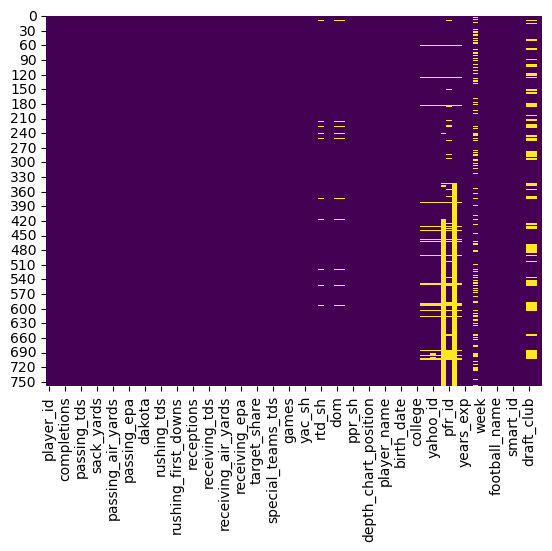

In [ ]:
Season_2024.isnull().sum()
sns.heatmap(Season_2024.isnull(),cbar=False, cmap='viridis')

In [46]:
Season_2024.nunique()

player_id       612
season            1
season_type       2
completions      75
attempts         80
               ... 
entry_year       18
rookie_year      18
draft_club       34
draft_number    204
age              20
Length: 93, dtype: int64

In [52]:
Season_2024.sort_values(by='completions',ascending=False).head()

,player_id,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,status_description_abbr,football_name,esb_id,gsis_it_id,smart_id,entry_year,rookie_year,draft_club,draft_number,age
341,00-0036442,2024,REG,460,652,4918.0,43,9.0,48.0,278.0,...,A01,Joe,BUR679731,52409,32004255-5267-9731-81c8-48673dcec5e2,2020,2020.0,CIN,1.0,27.0
206,00-0034855,2024,REG,407,570,4500.0,41,16.0,40.0,248.0,...,A01,Baker,MAY483453,46070,32004d41-5948-3453-e6ac-1ecff99fdcf6,2018,2018.0,CLE,1.0,29.0
26,00-0030565,2024,REG,407,578,4320.0,21,15.0,50.0,338.0,...,A01,Geno,SMI269700,39987,3200534d-4926-9700-a278-7821d73d1c6a,2013,2013.0,NYJ,39.0,33.0
130,00-0033873,2024,REG,392,581,3928.0,26,11.0,36.0,239.0,...,A01,Patrick,MAH401939,44822,32004d41-4840-1939-e4c1-bb89191b4e71,2017,2017.0,KC,10.0,28.0
84,00-0033106,2024,REG,390,539,4629.0,37,12.0,31.0,234.0,...,A01,Jared,GOF219636,43290,3200474f-4621-9636-7354-d2eb6365d257,2016,2016.0,LA,1.0,29.0


In [ ]:
QB_2024 = clean_QB(Season_2024)
QB_2024.head()

,player_id,player_name,years_exp,games,sacks,sack_yards,passing_epa,sack_fumbles,sack_fumbles_lost,passing_yards,passing_tds,interceptions,rushing_yards,rushing_tds,receptions,receiving_yards,receiving_tds,rushing_2pt_conversions,fantasy_points,fantasy_points_ppr
0,00-0023459,Aaron Rodgers,19,17,40.0,302.0,10.130993,5,2,3897.0,28,11.0,107.0,0,0,0.0,0,0,256.58,256.58
2,00-0026158,Joe Flacco,16,7,18.0,123.0,2.999386,3,3,1761.0,12,7.0,26.0,0,0,0.0,0,0,99.04,99.04
3,00-0026300,Josh Johnson,16,4,1.0,5.0,-1.809736,0,0,17.0,0,0.0,1.0,0,0,0.0,0,0,0.78,0.78
5,00-0026498,Matthew Stafford,15,18,28.0,213.0,34.734750,4,2,3762.0,20,8.0,41.0,0,0,0.0,0,0,214.58,214.58
6,00-0027973,Andy Dalton,13,6,7.0,37.0,-18.095891,1,0,989.0,7,6.0,34.0,0,0,0.0,0,0,58.96,58.96


In [ ]:
QB_2024.head()
QB_2024.isnull().sum() #checks for null values

player_id                  0
player_name                0
years_exp                  0
games                      0
sacks                      0
sack_yards                 0
passing_epa                0
sack_fumbles               0
sack_fumbles_lost          0
passing_yards              0
passing_tds                0
interceptions              0
rushing_yards              0
rushing_tds                0
receptions                 0
receiving_yards            0
receiving_tds              0
rushing_2pt_conversions    0
fantasy_points             0
fantasy_points_ppr         0
dtype: int64

### Scatter Plots

Text(0, 0.5, 'Fantasy Points')

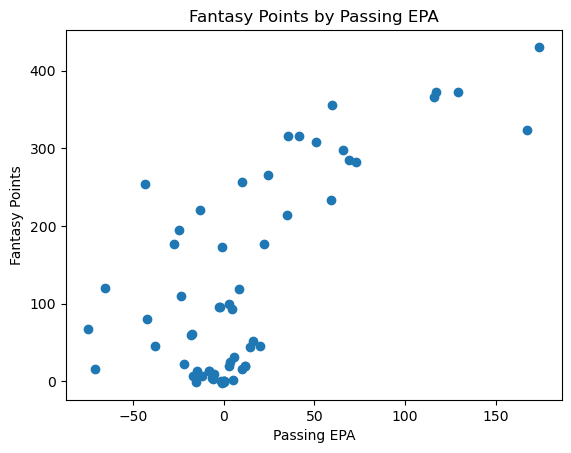

In [ ]:
plt.scatter(QB_2024['passing_epa'],QB_2024['fantasy_points'])
plt.title("Fantasy Points by Passing EPA")
plt.xlabel('Passing EPA')
plt.ylabel('Fantasy Points')
plt.text()

### Correlation 

In [53]:
Season_2024.corr()

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_5955/3362103822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Season_2024.corr()


,season,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,sack_fumbles,sack_fumbles_lost,...,ppr_sh,jersey_number,height,weight,years_exp,week,entry_year,rookie_year,draft_number,age
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
completions,NaN,1.000000,0.998121,0.995905,0.963215,0.917885,0.937991,0.936005,0.890050,0.713023,...,0.389591,-0.210221,0.118619,0.029572,0.153909,-0.027018,-0.153909,-0.154306,-0.244673,0.144096
attempts,NaN,0.998121,1.000000,0.994441,0.956088,0.923704,0.941495,0.940542,0.895276,0.726075,...,0.391285,-0.213013,0.121525,0.030890,0.152182,-0.031119,-0.152182,-0.152587,-0.245906,0.141843
passing_yards,NaN,0.995905,0.994441,1.000000,0.973285,0.915378,0.927102,0.924517,0.888912,0.706913,...,0.392579,-0.208702,0.120470,0.029880,0.154152,-0.021698,-0.154152,-0.154547,-0.241987,0.142108
passing_tds,NaN,0.963215,0.956088,0.973285,1.000000,0.858168,0.868877,0.864082,0.840276,0.651181,...,0.379843,-0.192292,0.111092,0.027094,0.152827,-0.004723,-0.152827,-0.153188,-0.240618,0.139760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
week,NaN,-0.027018,-0.031119,-0.021698,-0.004723,-0.065090,-0.031790,-0.030417,-0.062800,-0.069175,...,0.055376,-0.023225,0.010480,0.044807,0.026311,1.000000,-0.026311,-0.027551,-0.053905,0.003891
entry_year,NaN,-0.153909,-0.152182,-0.154152,-0.152827,-0.147492,-0.122743,-0.127077,-0.144650,-0.113137,...,-0.107743,0.087128,-0.097281,-0.103919,-1.000000,-0.026311,1.000000,0.999351,0.219116,-0.945451
rookie_year,NaN,-0.154306,-0.152587,-0.154547,-0.153188,-0.147885,-0.123142,-0.127472,-0.145046,-0.113480,...,-0.108117,0.085831,-0.099022,-0.107138,-0.999351,-0.027551,0.999351,1.000000,0.219116,-0.944573
draft_number,NaN,-0.244673,-0.245906,-0.241987,-0.240618,-0.218088,-0.236941,-0.243457,-0.204844,-0.166307,...,-0.421158,0.238235,-0.099697,-0.030308,-0.219116,-0.053905,0.219116,0.219116,1.000000,-0.117441


In [59]:
QB_2024.corr().sort_values(by='fantasy_points').tail(8)

/var/folders/k5/1qrkb58x6nn6nr4y1p7c9m100000gn/T/ipykernel_5955/1901621774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  QB_2024.corr().sort_values(by='fantasy_points').tail(8)


,years_exp,games,sacks,sack_yards,passing_epa,sack_fumbles,sack_fumbles_lost,passing_yards,passing_tds,interceptions,rushing_yards,rushing_tds,receptions,receiving_yards,receiving_tds,rushing_2pt_conversions,fantasy_points,fantasy_points_ppr
rushing_yards,-0.200296,0.718654,0.626672,0.581453,0.485310,0.479142,0.326095,0.646141,0.649395,0.424954,1.000000,0.715518,0.122160,0.017148,0.080372,0.689139,0.790856,0.790632
sack_yards,0.038193,0.848459,0.986161,1.000000,0.264901,0.778838,0.595732,0.864686,0.766540,0.768194,0.581453,0.272941,0.208933,0.182080,0.157105,0.167485,0.794436,0.794355
sacks,0.006591,0.848269,1.000000,0.986161,0.284797,0.796735,0.615664,0.867577,0.779667,0.760399,0.626672,0.303091,0.171220,0.146300,0.108441,0.210700,0.812580,0.812426
games,0.053445,1.000000,0.848269,0.848459,0.570981,0.705441,0.452546,0.950310,0.900029,0.782360,0.718654,0.509897,0.316758,0.260015,0.246911,0.328560,0.944537,0.944555
passing_yards,0.132863,0.950310,0.867577,0.864686,0.630695,0.771430,0.473785,1.000000,0.960719,0.848272,0.646141,0.408216,0.336679,0.308350,0.282829,0.302504,0.963782,0.963822
passing_tds,0.135844,0.900029,0.779667,0.766540,0.744944,0.721314,0.434207,0.960719,1.000000,0.776664,0.649395,0.403962,0.358612,0.343239,0.324776,0.328246,0.965293,0.965369
fantasy_points_ppr,0.061362,0.944555,0.812426,0.794355,0.718027,0.724192,0.436068,0.963822,0.965369,0.746220,0.790632,0.579541,0.324824,0.282036,0.280895,0.417636,0.999999,1.000000
fantasy_points,0.061419,0.944537,0.812580,0.794436,0.717803,0.724452,0.436587,0.963782,0.965293,0.746090,0.790856,0.579769,0.323330,0.280795,0.279695,0.417947,1.000000,0.999999


In [20]:
np.corrcoef(QB_2024['passing_epa'],QB_2024['fantasy_points'])

array([[1.        , 0.71780279],
       [0.71780279, 1.        ]])